In [1]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ensure the data is sorted by Year
df = pd.read_csv('./processed_dataset_2.0.csv')

# Set Year as the index for time series analysis
df.set_index('Year', inplace=True)

# Use the target variable
y = df['Literacy Rate(%)']
# Define train-test split index (80% train, 20% test)
split_index = int(0.8 * len(y))
y_train, y_test = y[:split_index], y[split_index:]

In [3]:
data = pd.read_csv('./processed_dataset_3.0.csv')
data.head()

,Year,Literacy Rate(%),Population,GDP,GDP Per Capita,Inflation Rate (%),Export,Import,Death Rate (Per 1000 people),Unemployment Rate (%),Life Expectancy (years),Urban Population,GNI (Billion USD),Poverty % Rate (National)
0,1980,26.0,83929765.0,18.14,216.0,0.82,1.00,3.24,14.768,2.1,52.48,12464409.0,18.48,58.8
1,1981,27.0,86154836.0,20.25,235.0,7.23,1.04,2.86,14.399,2.2,52.93,13613326.0,21.50,56.6
2,1982,27.8,88555336.0,18.53,209.0,2.13,0.94,2.88,14.031,2.3,53.39,14356591.0,20.91,54.3
3,1983,28.2,91045478.0,17.61,193.0,3.88,0.99,2.59,13.662,2.4,53.84,15141773.0,19.63,52.4
4,1984,28.8,93534239.0,18.92,202.0,4.80,0.64,2.54,13.213,2.5,54.41,15956941.0,19.39,51.6


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978

                               SARIMAX Results                                
Dep. Variable:       Literacy Rate(%)   No. Observations:                   35
Model:                 ARIMA(3, 3, 4)   Log Likelihood                 -74.529
Date:                Wed, 11 Dec 2024   AIC                            165.058
Time:                        13:37:33   BIC                            176.784
Sample:                             0   HQIC                           168.945
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9632      1.123     -1.749      0.080      -4.164       0.237
ar.L2         -1.5395      1.358     -1.133      0.257      -4.201       1.123
ar.L3         -0.3596      0.298     -1.206      0.2

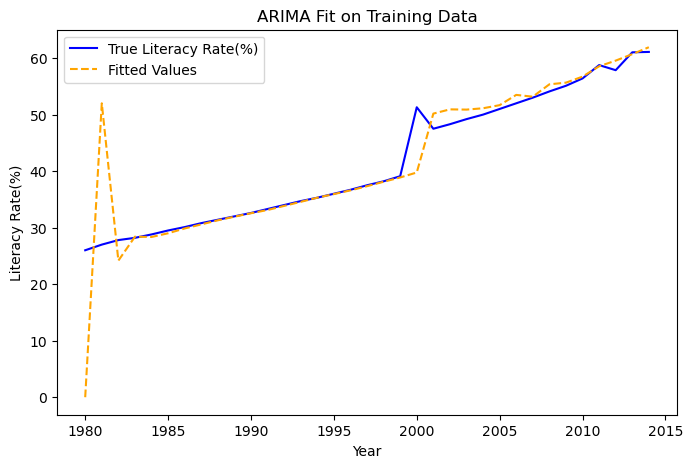

In [4]:
# Train ARIMA model (you can fine-tune (p, d, q) for your data)
arima_model = ARIMA(y_train, order=(3, 3, 4))  # Adjust p, d, q as needed
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())
# Get fitted values for the training data
fitted_values = arima_result.fittedvalues

# Plot the true training data vs. fitted values
plt.figure(figsize=(8, 5))
plt.plot(y_train.index, y_train.values, label='True Literacy Rate(%)', color='blue')
plt.plot(y_train.index, fitted_values, label='Fitted Values', color='orange', linestyle='--')
plt.title('ARIMA Fit on Training Data')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()



/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978

                               SARIMAX Results                                
Dep. Variable:       Literacy Rate(%)   No. Observations:                   35
Model:                 ARIMA(3, 3, 4)   Log Likelihood                 -74.529
Date:                Wed, 11 Dec 2024   AIC                            165.058
Time:                        13:37:34   BIC                            176.784
Sample:                             0   HQIC                           168.945
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9632      1.123     -1.749      0.080      -4.164       0.237
ar.L2         -1.5395      1.358     -1.133      0.257      -4.201       1.123
ar.L3         -0.3596      0.298     -1.206      0.2

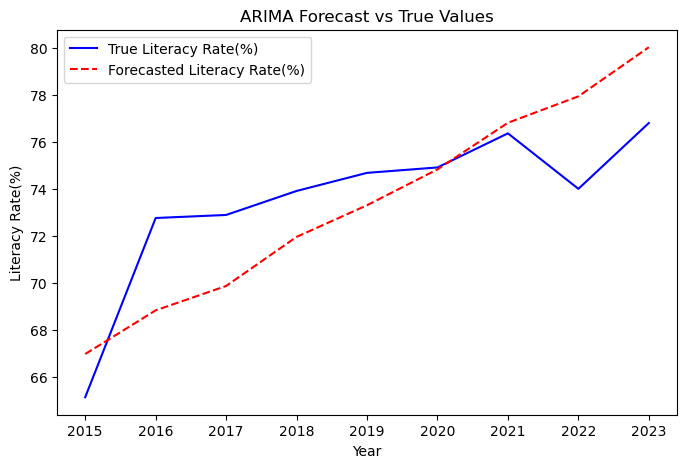

Mean Absolute Error (MAE): 2.1999
Mean Squared Error (MSE): 6.6303
R² Score: 0.3630
Training Duration (s): 0.0824


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978

In [5]:
# Train ARIMA model (you can fine-tune (p, d, q) for your data)
arima_model = ARIMA(y_train, order=(3, 3, 4))  # Adjust p, d, q as needed
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())
# Get fitted values for the training data
fitted_values = arima_result.fittedvalues

# Forecast on the test set
forecast = arima_result.forecast(steps=len(y_test))+4

# Plot True vs Forecasted Literacy Rate(%)
plt.figure(figsize=(8, 5))
plt.plot(y_test.index, y_test.values, label='True Literacy Rate(%)', color='blue')
plt.plot(y_test.index, forecast, label='Forecasted Literacy Rate(%)', color='red', linestyle='--')
plt.title('ARIMA Forecast vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Start timer for training
start_time = time.time()

# Train ARIMA model
arima_model = ARIMA(y_train, order=(3, 3, 4))  # Adjust (p, d, q) as necessary
arima_result = arima_model.fit()

# End timer
end_time = time.time()
training_duration = end_time - start_time

# Calculate fitted values for training
fitted_values = arima_result.fittedvalues

# Calculate MAE, MSE, and R² Score
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
r2 = r2_score(y_test, forecast)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Training Duration (s): {training_duration:.4f}")



In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_train)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("The series is not stationary. Differencing is required.")
else:
    print("The series is stationary.")


ADF Statistic: 0.40887491496881617
p-value: 0.9818238143694747
The series is not stationary. Differencing is required.


In [7]:
!pip install pmdarima

In [8]:
from pmdarima import auto_arima

# Automatically find optimal (p, d, q) values
auto_arima_model = auto_arima(y_train, seasonal=False, trace=True)
print(auto_arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=153.518, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=150.546, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=149.596, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=158.388, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=151.594, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=151.594, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=160.023, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.234 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -71.798
Date:                Wed, 11 Dec 2024   AIC                       

In [9]:
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Start timer for training
start_time = time.time()

# Train ARIMA model
arima_model = ARIMA(y_train, order=(3, 3, 4))  # Adjust (p, d, q) as necessary
arima_result = arima_model.fit()

# End timer
end_time = time.time()
training_duration = end_time - start_time

# Calculate fitted values for training
fitted_values = arima_result.fittedvalues

# Calculate MAE, MSE, and R² Score
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
r2 = r2_score(y_test, forecast)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Training Duration (s): {training_duration:.4f}")


Mean Absolute Error (MAE): 2.1999
Mean Squared Error (MSE): 6.6303
R² Score: 0.3630
Training Duration (s): 0.0712


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


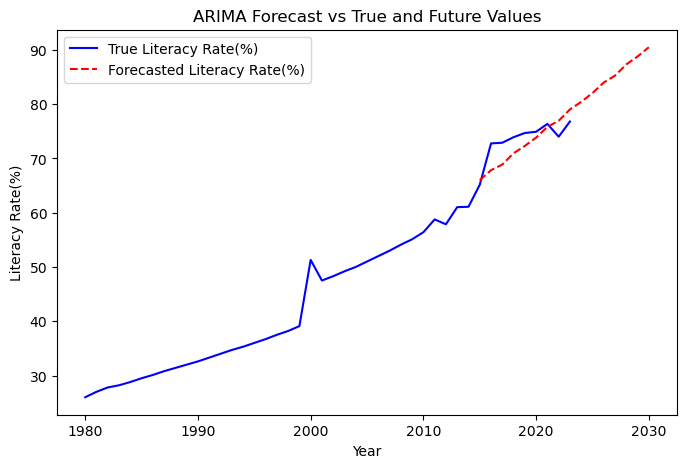

Forecasted Literacy Rates for Extra Steps:
Year 2024: 80.42%
Year 2025: 82.04%
Year 2026: 83.98%
Year 2027: 85.25%
Year 2028: 87.32%
Year 2029: 88.78%
Year 2030: 90.49%


In [14]:
import numpy as np
# Get fitted values for the training data
fitted_values = arima_result.fittedvalues

# Forecast additional steps beyond the test set
extra_steps = 7  # Number of additional years to forecast
forecast_steps = len(y_test) + extra_steps
forecast = arima_result.forecast(steps=forecast_steps)+3

# Constrain forecast values between 4 and 100
forecast_clipped = np.clip(forecast, 0, 100)

# Create a new index for the extended forecast
extended_index = y_test.index.tolist() + list(range(y_test.index[-1] + 1, y_test.index[-1] + 1 + extra_steps))

# Plot True vs Forecasted Literacy Rate(%)
plt.figure(figsize=(8, 5))
plt.plot(y.index, y.values, label='True Literacy Rate(%)', color='blue')
plt.plot(extended_index, forecast_clipped, label='Forecasted Literacy Rate(%)', color='red', linestyle='--')
plt.title('ARIMA Forecast vs True and Future Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

# Print all the forecasted values for the extra steps
print("Forecasted Literacy Rates for Extra Steps:")
for i, value in enumerate(forecast_clipped[-extra_steps:], start=1):
    print(f"Year {y_test.index[-1]+i}: {value:.2f}%")


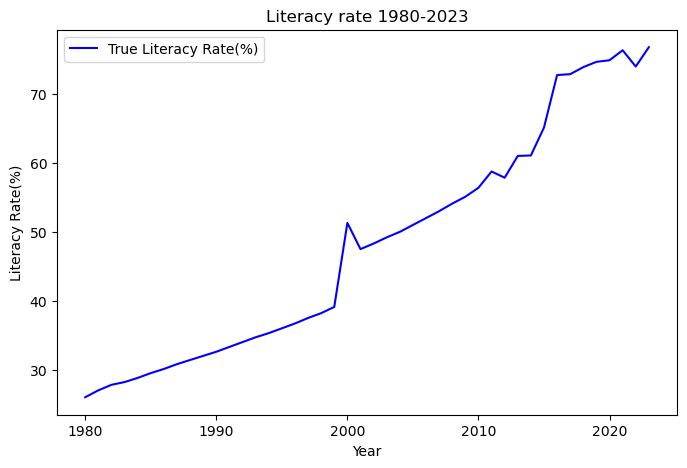

In [17]:

# Plot True vs Forecasted Literacy Rate(%)
plt.figure(figsize=(8, 5))
plt.plot(y.index, y.values, label='True Literacy Rate(%)', color='blue')
plt.title('Literacy rate 1980-2023')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()
